In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [2]:
df = acquire.wrangle_data()

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [3]:
df.head()

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,module,lesson
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,None,None
2018-01-26 09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,java-ii,None
2018-01-26 09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,java-ii,object-oriented-programming
2018-01-26 09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,1.0,Full Stack PHP,slides,object_oriented_programming
2018-01-26 09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,conditionals


In [6]:
df['current_student'] = (df.index > df.start_date) & (df.index < df.end_date)

In [9]:
current = df[df.current_student]

In [58]:
def reset():
    df = acquire.wrangle_data()
    df['current_student'] = (df.index > df.start_date) & (df.index < df.end_date)
    current = df[df.current_student]
    return current

In [50]:
current = current[current.cohort_name != 'Oberon']

In [51]:
x = current.groupby(['cohort_name']).module.value_counts().groupby(level=0, group_keys=False).nlargest(4)
x

cohort_name  module      
Andromeda    javascript-i    3728
             html-css        2668
             mysql           2641
             jquery          1970
Apex         javascript-i    3990
                             ... 
Yosemite     spring          1624
Zion         javascript-i    5282
             mysql           4404
             html-css        3464
             jquery          3277
Name: module, Length: 112, dtype: int64

In [52]:
a = current.groupby(['cohort_name']).module.value_counts()
y = a[a > 20].groupby(level=0, group_keys=False).nsmallest(4)
y

cohort_name  module    
Andromeda    prework        21
             web-design     53
             content       115
             search        240
Apex         elements       23
                          ... 
Yosemite     appendix      636
Zion         prework        39
             assets         54
             slides         79
             search        612
Name: module, Length: 112, dtype: int64

In [53]:
x = pd.DataFrame(x.rename('vcount'))
y = pd.DataFrame(y.rename('vcount'))

In [54]:
x.to_clipboard()

In [55]:
y.to_clipboard()

<AxesSubplot:xlabel='vcount', ylabel='module'>

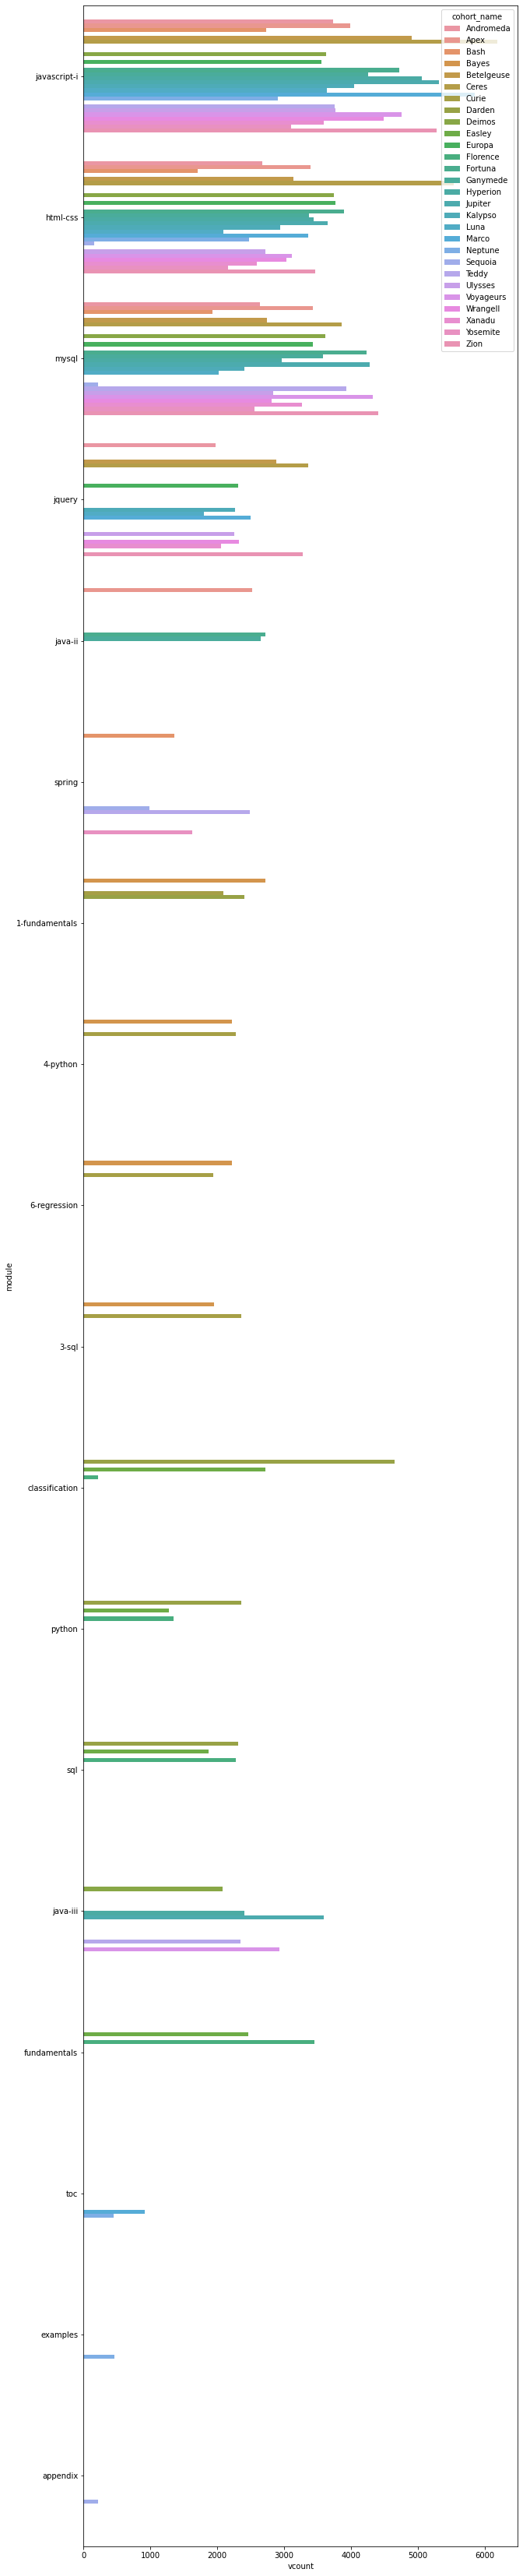

In [56]:
plt.figure(figsize=(10,60))
sns.barplot(data=  x.reset_index(), y='module', x='vcount', hue='cohort_name')

<AxesSubplot:xlabel='vcount', ylabel='module'>

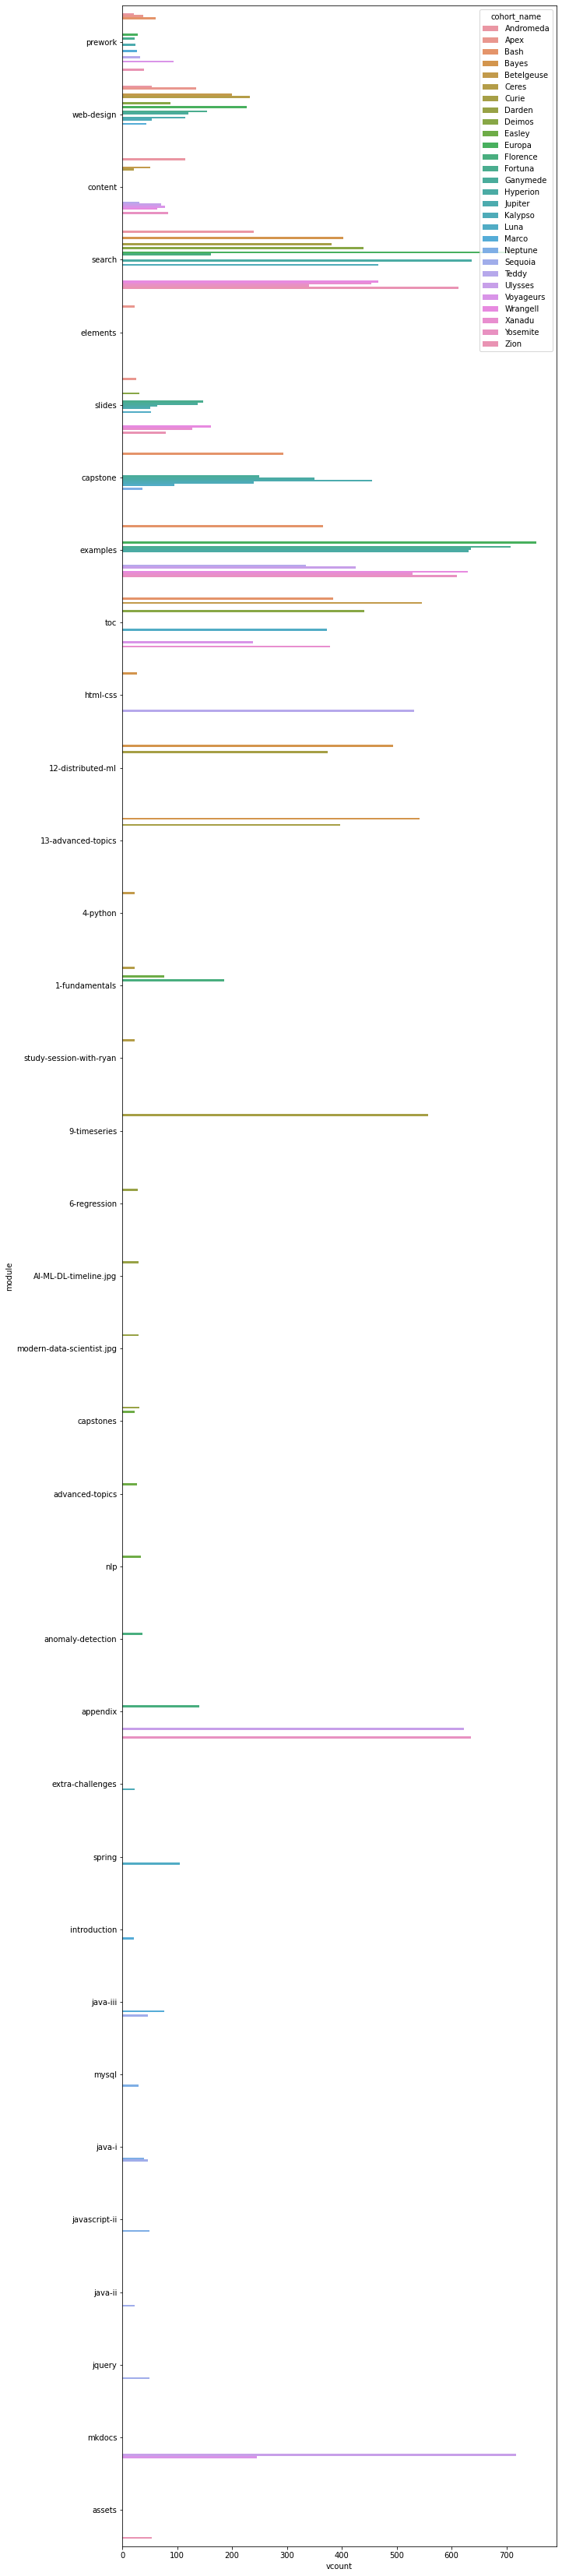

In [57]:
plt.figure(figsize=(10,60))
sns.barplot(data=  y.reset_index(), y='module', x='vcount', hue='cohort_name')

In [63]:
current = reset()
current.dropna(subset='module')

,ip,endpoint,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program,module,lesson,current_student
datetime,,,,,,,,,,,,,
2018-01-26 09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,conditionals,True
2018-01-26 09:56:41,97.105.19.61,javascript-i/loops,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,loops,True
2018-01-26 09:56:46,97.105.19.61,javascript-i/conditionals,3,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,conditionals,True
2018-01-26 09:56:48,97.105.19.61,javascript-i/functions,3,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,functions,True
2018-01-26 09:56:59,97.105.19.61,javascript-i/loops,2,22.0,Teddy,#teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2.0,Full Stack Java,javascript-i,loops,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,136.50.98.51,jquery/personal-site,869,135.0,Marco,#marco,2021-01-25 00:00:00,2021-07-19 00:00:00,2.0,Full Stack Java,jquery,personal-site,True
2021-04-21 16:36:34,104.48.214.211,html-css/css-ii/bootstrap-grid-system,948,138.0,Neptune,#neptune,2021-03-15 00:00:00,2021-09-03 00:00:00,2.0,Full Stack Java,html-css,css-ii,True
2021-04-21 16:37:48,67.11.50.23,java-iii,834,134.0,Luna,#luna,2020-12-07 00:00:00,2021-06-08 00:00:00,2.0,Full Stack Java,java-iii,None,True


In [87]:
mods = current.module.unique().tolist()
mods.remove(None)
mods = [col for col in mods if 'java-' in col]

ValueError: list.remove(x): x not in list

In [94]:
current = current[current.module.isin(mods)]
current = current[current.module != 'java-1']

In [95]:
current= current[current.program !='Data Science']

In [96]:
a = current.groupby('cohort_name').module.value_counts().rename('vcount')

a= a.reset_index()

,cohort_name,module,vcount
0,Andromeda,java-iii,1612
1,Andromeda,java-ii,1497
2,Andromeda,java-i,1097
3,Apex,java-ii,2523
4,Apex,java-iii,2328
...,...,...,...
67,Yosemite,java-ii,1243
68,Yosemite,java-i,946
69,Zion,java-ii,2645
70,Zion,java-iii,2571


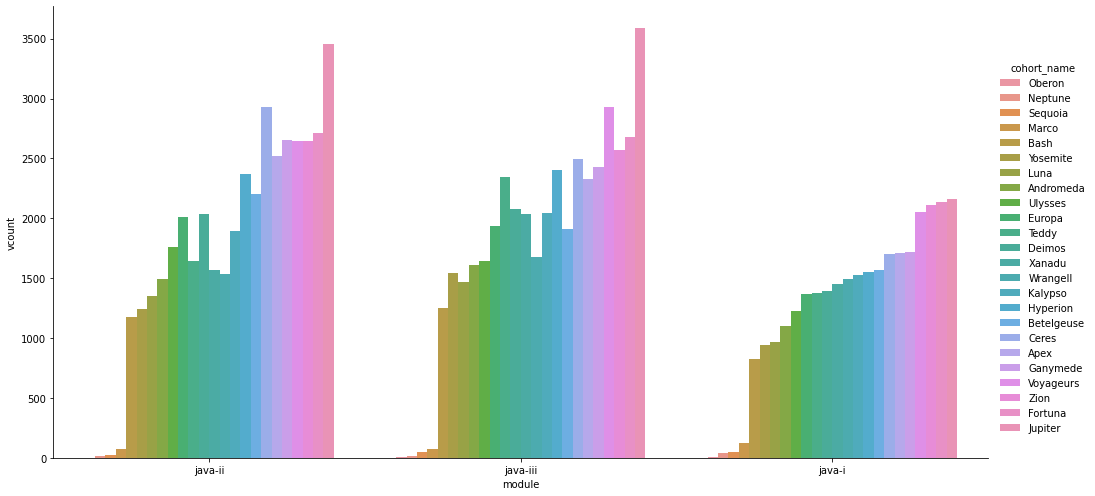

In [111]:
plt.figure(figsize=(15,10))
sns.catplot(kind= 'bar', data=a.sort_values(by='vcount'), x='module', y='vcount', hue='cohort_name', height=7, aspect=2)

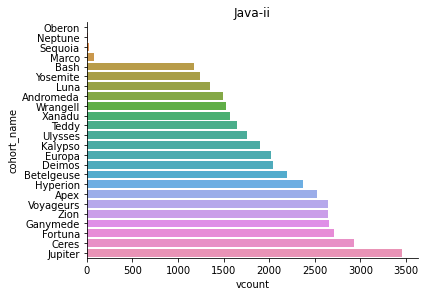

In [125]:
sns.catplot(kind= 'bar', data=a[a.module=='java-ii'].sort_values(by='vcount'), y='cohort_name', x='vcount', height=4, aspect=1.5).set(title='Java-ii')
plt.savefig('java-ii.png')